In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.utils.data as tdata
from torch.utils.data import DataLoader
# from tqdm.notebook import tqdm
import torch.nn.functional as F
from torch.optim import SGD
import torchvision as tv

/opt/homebrew/Caskroom/miniforge/base/envs/vir_mamba/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_data = np.load(f'data/rgbs.npy', allow_pickle=True)
label_data = np.load(f'data/labels.npy', allow_pickle=True)

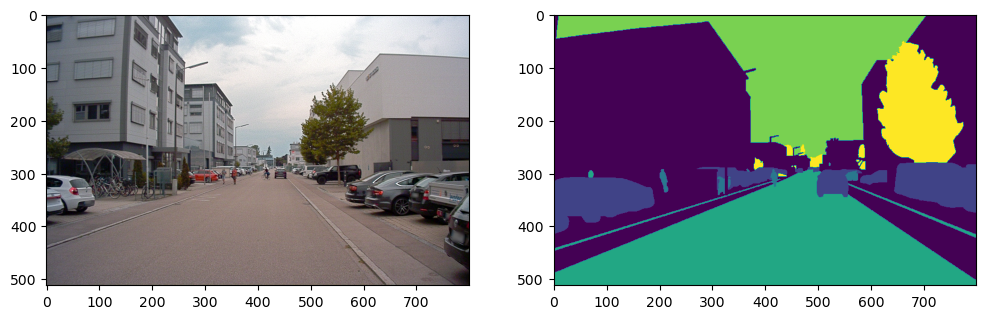

In [3]:
fig = plt.figure(figsize=(12, 6))
columns = 2
rows = 1
for i in range(1, columns*rows +1 - 1):
    img = train_data[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)

columns = 2
rows = 1
for i in range(2, columns*rows +1):
    img = label_data[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [4]:
# vgg11 = tv.models.vgg11(weights=tv.models.VGG11_Weights).features
vgg11_f = tv.models.vgg11_bn()
# resnet_f = tv.models.resnet18()
# vgg11_f
# (vgg11_f[0]).kernel_size

In [1018]:
# dir(vgg11_f)
# enc_convs = []
# for mod in vgg11_f.modules():
    # if mod.__module__ == 'torch.nn.modules.activation':
    # print(type(mod))
        # enc_convs.append(mod)
        # if len(enc_convs) == 8:
        #     break
# list(vgg11_f.named_parameters())

# dir(vgg11_f[0])
# for param in vgg11_f[0].named_parameters():
#     print(param)

for param in vgg11_f.modules():
    print(param)

# for param in resnet_f.named_modules():
#     print(param)

# enc_convs = []
# enc_acts  = []
# enc_bns   = []
# for mod in vgg11_f.modules():
#     if issubclass(type(mod), torch.nn.modules.conv.Conv2d):
#         enc_convs.append(mod)
#     elif mod.__module__ == 'torch.nn.modules.activation':
#         enc_acts.append(mod)
#     elif issubclass(type(mod), torch.nn.modules.batchnorm.BatchNorm2d):
#         enc_bns.append(mod) 

#     if isinstance(mod, nn.Linear):
#         print("heheh")

#     if isinstance(mod, nn.Conv2d):
#         print("lalal")

# # for elem in zip(enc_convs, enc_acts, enc_bns):
# #     print(elem)
# print(len(list(zip(enc_convs, enc_acts, enc_bns))))

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(ke

In [47]:
enc_convs = []
enc_acts  = []
enc_bns   = []
for mod in vgg11_f.modules():
    if issubclass(type(mod), torch.nn.modules.conv.Conv2d):
        enc_convs.append(mod)
        print(mod.in_channels, mod.out_channels)
    elif mod.__module__ == 'torch.nn.modules.activation':
        enc_acts.append(mod)
    elif issubclass(type(mod), torch.nn.modules.batchnorm.BatchNorm2d):
        enc_bns.append(mod) 

3 64
64 128
128 256
256 256
256 512
512 512
512 512
512 512


In [31]:
from hw_4 import UnetFromPretrained, load_model

In [2]:
# unet = UnetFromPretrained(SimpleConvModel(), 5)
from hw_4 import UnetFromPretrained, load_model

# model = load_model()
unet = UnetFromPretrained(tv.models.vgg16_bn().features, 6)
ten_to_unet = torch.ones(1, 3, 512, 800, dtype=torch.float32)
ten_to_unet.shape
unet(ten_to_unet).shape


torch.Size([1, 6, 512, 800])

In [26]:
# for mod in unet.modules():
    # print(mod)
# for mod in unet.modules():
#     print(mod)

# saved_model = torch.load("best_model.pth")
# print(saved_model)
# unet.load_state_dict(saved_model)


RuntimeError: Error(s) in loading state_dict for UnetFromPretrained:
	Missing key(s) in state_dict: "encoder.0.weight", "encoder.0.bias", "encoder.1.weight", "encoder.1.bias", "encoder.1.running_mean", "encoder.1.running_var", "encoder.3.weight", "encoder.3.bias", "encoder.4.weight", "encoder.4.bias", "encoder.4.running_mean", "encoder.4.running_var", "encoder.7.weight", "encoder.7.bias", "encoder.8.weight", "encoder.8.bias", "encoder.8.running_mean", "encoder.8.running_var", "encoder.10.weight", "encoder.10.bias", "encoder.11.weight", "encoder.11.bias", "encoder.11.running_mean", "encoder.11.running_var", "encoder.14.weight", "encoder.14.bias", "encoder.15.weight", "encoder.15.bias", "encoder.15.running_mean", "encoder.15.running_var", "encoder.17.weight", "encoder.17.bias", "encoder.18.weight", "encoder.18.bias", "encoder.18.running_mean", "encoder.18.running_var", "encoder.20.weight", "encoder.20.bias", "encoder.21.weight", "encoder.21.bias", "encoder.21.running_mean", "encoder.21.running_var", "encoder.24.weight", "encoder.24.bias", "encoder.25.weight", "encoder.25.bias", "encoder.25.running_mean", "encoder.25.running_var", "encoder.27.weight", "encoder.27.bias", "encoder.28.weight", "encoder.28.bias", "encoder.28.running_mean", "encoder.28.running_var", "encoder.30.weight", "encoder.30.bias", "encoder.31.weight", "encoder.31.bias", "encoder.31.running_mean", "encoder.31.running_var", "encoder.34.weight", "encoder.34.bias", "encoder.35.weight", "encoder.35.bias", "encoder.35.running_mean", "encoder.35.running_var", "encoder.37.weight", "encoder.37.bias", "encoder.38.weight", "encoder.38.bias", "encoder.38.running_mean", "encoder.38.running_var", "encoder.40.weight", "encoder.40.bias", "encoder.41.weight", "encoder.41.bias", "encoder.41.running_mean", "encoder.41.running_var". 
	Unexpected key(s) in state_dict: "decoder_layer_trans_conv_0.0.weight", "decoder_layer_trans_conv_0.0.bias", "decoder_layer_trans_conv_0.1.weight", "decoder_layer_trans_conv_0.1.bias", "decoder_layer_trans_conv_0.1.running_mean", "decoder_layer_trans_conv_0.1.running_var", "decoder_layer_trans_conv_0.1.num_batches_tracked", "decoder_layer_trans_conv_0.3.weight", "decoder_layer_trans_conv_0.3.bias", "decoder_layer_0.0.weight", "decoder_layer_0.0.bias", "decoder_layer_0.1.weight", "decoder_layer_0.1.bias", "decoder_layer_0.1.running_mean", "decoder_layer_0.1.running_var", "decoder_layer_0.1.num_batches_tracked", "decoder_layer_0.3.weight", "decoder_layer_0.3.bias", "decoder_layer_0.4.weight", "decoder_layer_0.4.bias", "decoder_layer_0.4.running_mean", "decoder_layer_0.4.running_var", "decoder_layer_0.4.num_batches_tracked", "decoder_layer_0.6.weight", "decoder_layer_0.6.bias", "decoder_layer_0.7.weight", "decoder_layer_0.7.bias", "decoder_layer_0.7.running_mean", "decoder_layer_0.7.running_var", "decoder_layer_0.7.num_batches_tracked", "decoder_layer_trans_conv_1.weight", "decoder_layer_trans_conv_1.bias", "decoder_layer_1.0.weight", "decoder_layer_1.0.bias", "decoder_layer_1.1.weight", "decoder_layer_1.1.bias", "decoder_layer_1.1.running_mean", "decoder_layer_1.1.running_var", "decoder_layer_1.1.num_batches_tracked", "decoder_layer_1.3.weight", "decoder_layer_1.3.bias", "decoder_layer_1.4.weight", "decoder_layer_1.4.bias", "decoder_layer_1.4.running_mean", "decoder_layer_1.4.running_var", "decoder_layer_1.4.num_batches_tracked", "decoder_layer_1.6.weight", "decoder_layer_1.6.bias", "decoder_layer_1.7.weight", "decoder_layer_1.7.bias", "decoder_layer_1.7.running_mean", "decoder_layer_1.7.running_var", "decoder_layer_1.7.num_batches_tracked", "decoder_layer_trans_conv_2.weight", "decoder_layer_trans_conv_2.bias", "decoder_layer_2.0.weight", "decoder_layer_2.0.bias", "decoder_layer_2.1.weight", "decoder_layer_2.1.bias", "decoder_layer_2.1.running_mean", "decoder_layer_2.1.running_var", "decoder_layer_2.1.num_batches_tracked", "decoder_layer_2.3.weight", "decoder_layer_2.3.bias", "decoder_layer_2.4.weight", "decoder_layer_2.4.bias", "decoder_layer_2.4.running_mean", "decoder_layer_2.4.running_var", "decoder_layer_2.4.num_batches_tracked", "decoder_layer_2.6.weight", "decoder_layer_2.6.bias", "decoder_layer_2.7.weight", "decoder_layer_2.7.bias", "decoder_layer_2.7.running_mean", "decoder_layer_2.7.running_var", "decoder_layer_2.7.num_batches_tracked", "decoder_layer_trans_conv_3.weight", "decoder_layer_trans_conv_3.bias", "decoder_layer_3.0.weight", "decoder_layer_3.0.bias", "decoder_layer_3.1.weight", "decoder_layer_3.1.bias", "decoder_layer_3.1.running_mean", "decoder_layer_3.1.running_var", "decoder_layer_3.1.num_batches_tracked", "decoder_layer_3.3.weight", "decoder_layer_3.3.bias", "decoder_layer_3.4.weight", "decoder_layer_3.4.bias", "decoder_layer_3.4.running_mean", "decoder_layer_3.4.running_var", "decoder_layer_3.4.num_batches_tracked", "decoder_layer_trans_conv_4.weight", "decoder_layer_trans_conv_4.bias", "decoder_layer_4.0.weight", "decoder_layer_4.0.bias", "decoder_layer_4.1.weight", "decoder_layer_4.1.bias", "decoder_layer_4.1.running_mean", "decoder_layer_4.1.running_var", "decoder_layer_4.1.num_batches_tracked", "decoder_layer_4.3.weight", "decoder_layer_4.3.bias", "decoder_layer_4.4.weight", "decoder_layer_4.4.bias", "decoder_layer_4.4.running_mean", "decoder_layer_4.4.running_var", "decoder_layer_4.4.num_batches_tracked", "decoder_layer_4.6.weight", "decoder_layer_4.6.bias". 

In [102]:
from functools import reduce
a = [(1, 2, 3), (1, 2, 3)]
print(list(map(list, a)))
flatten_list = reduce(lambda z, y :z + y, a)
print(flatten_list)

[[1, 2, 3], [1, 2, 3]]
(1, 2, 3, 1, 2, 3)


In [981]:
ons = torch.ones(1, 32, 32)
cnv = nn.Conv2d(1, 3, kernel_size=3, stride=1, padding=1)
cnv2 = nn.Conv2d(3, 6, kernel_size=3, stride=1, padding=1)
cnvT = nn.ConvTranspose2d(1, 3, kernel_size=2, stride=2, padding=0)
cnvT2 = nn.ConvTranspose2d(512, 512, kernel_size=2, stride=2, padding=0)


pool = nn.MaxPool2d(kernel_size=2, stride=5)
unpool = nn.ConvTranspose2d(1, 1, kernel_size=2, stride=5, padding=0)

In [982]:
# ons2 = cnv(ons)
# ons3 = cnv2(ons2)
ons_pooled = pool(ons)
ons_unpooled = unpool(ons_pooled)
ons.shape, ons_pooled.shape, ons_unpooled.shape

(torch.Size([1, 32, 32]), torch.Size([1, 7, 7]), torch.Size([1, 32, 32]))

In [220]:
(torch.cat([ons2, ons2], dim=0)).shape

torch.Size([6, 32, 32])

In [284]:
print(ons.shape)
ons3 = cnvT(ons)

ons3.shape

torch.Size([1, 32, 32])


torch.Size([3, 64, 64])

In [318]:
ons_again = torch.ones(1, 512, 4, 4)
cnvT2(ons_again).shape

torch.Size([1, 512, 8, 8])

In [452]:
seq_mod = torch.nn.Sequential(nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1),
                              nn.Conv2d(1, 3, kernel_size=3, stride=1, padding=1),
                              nn.Conv2d(3, 1, kernel_size=3, stride=1, padding=1),
                              nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1))
new_ons = seq_mod(ons)
new_ons.shape
simplemod = SimpleConvModel()
new_ons = simplemod(ons)
new_ons.shape

torch.Size([1, 32, 32])

In [460]:
list(simplemod.modules())

[SimpleConvModel(
   (conv1): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (conv2): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (conv3): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (conv4): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
 ),
 Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))]

In [627]:
# ons10 = ons.copy()
ons
ons10 = cnv(ons)
ons10, ons
ons11 = ons10
ons11 = cnv2(ons11)
ons11[0][0][0], ons10[0][0][0]

(tensor(0.0884, grad_fn=<SelectBackward0>),
 tensor(0.4541, grad_fn=<SelectBackward0>))

In [629]:
issubclass(torch.nn.modules.BatchNorm2d, torch.nn.modules.conv.Conv2d)

False

In [664]:
torch_img1 = torch.tensor(train_data[i].transpose(2, 0, 1), dtype=torch.float32).unsqueeze(0)
torch_img1.shape

torch.Size([1, 3, 512, 800])

In [689]:
torch_img1_unetted = unet(torch_img1)

In [690]:
img1_numpy = torch_img1_unetted.squeeze(0).sum(0).detach().numpy()
img1_numpy2 = torch_img1_unetted.squeeze(0)[0].detach().numpy()


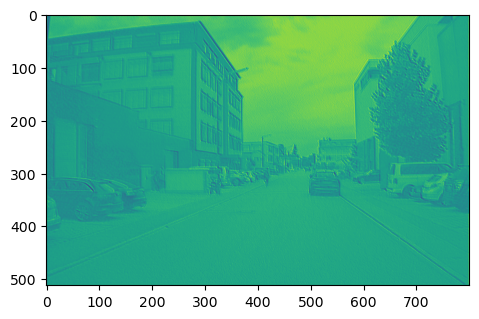

In [691]:
fig = plt.figure(figsize=(12, 6))
columns = 2
rows = 1
for i in range(1, columns*rows +1 - 1):
    # img = np.array(img1_numpy, dtype=np.)
    img = img1_numpy
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)


In [795]:
x_seq = nn.Sequential(*[nn.Conv2d(1, 2, 3), nn.Conv2d(1, 2, 3), nn.Conv2d(1, 2, 3)], nn.Conv2d(1, 2, 3))
x_seq.append(nn.Conv2d(10, 20, 30))
len(x_seq)

5

In [876]:
for i, mod in enumerate(list(vgg11_f.modules())):
    # if type(mod) not in [
    #             'torch.nn.modules.activation.ReLU',
    #             'torch.nn.modules.batchnorm.BatchNorm2d',
    #             'torch.nn.modules.conv.Conv2d',
    #             'torch.nn.modules.dropout.Dropout',
    #             'torch.nn.modules.pooling.MaxPool2d']:
        # continue
    print(i, type(mod), "\\n")
    # print(type(mod) not in [
    #             'torch.nn.modules.activation.ReLU',
    #             'torch.nn.modules.batchnorm.BatchNorm2d',
    #             'torch.nn.modules.conv.Conv2d',
    #             'torch.nn.modules.dropout.Dropout',
    #             'torch.nn.modules.pooling.MaxPool2d'])


0 <class 'torchvision.models.vgg.VGG'> \n
1 <class 'torch.nn.modules.container.Sequential'> \n
2 <class 'torch.nn.modules.conv.Conv2d'> \n
3 <class 'torch.nn.modules.batchnorm.BatchNorm2d'> \n
4 <class 'torch.nn.modules.activation.ReLU'> \n
5 <class 'torch.nn.modules.pooling.MaxPool2d'> \n
6 <class 'torch.nn.modules.conv.Conv2d'> \n
7 <class 'torch.nn.modules.batchnorm.BatchNorm2d'> \n
8 <class 'torch.nn.modules.activation.ReLU'> \n
9 <class 'torch.nn.modules.pooling.MaxPool2d'> \n
10 <class 'torch.nn.modules.conv.Conv2d'> \n
11 <class 'torch.nn.modules.batchnorm.BatchNorm2d'> \n
12 <class 'torch.nn.modules.activation.ReLU'> \n
13 <class 'torch.nn.modules.conv.Conv2d'> \n
14 <class 'torch.nn.modules.batchnorm.BatchNorm2d'> \n
15 <class 'torch.nn.modules.activation.ReLU'> \n
16 <class 'torch.nn.modules.pooling.MaxPool2d'> \n
17 <class 'torch.nn.modules.conv.Conv2d'> \n
18 <class 'torch.nn.modules.batchnorm.BatchNorm2d'> \n
19 <class 'torch.nn.modules.activation.ReLU'> \n
20 <class 'torc

[autoreload of hw_4 failed: Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/vir_mamba/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/vir_mamba/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 459, in superreload
    module = reload(module)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/vir_mamba/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/mitrylitvin/School/SEMESTER_5/VIR/hw04/hw_4

In [858]:
for i, mod in enumerate(list(x_seq.modules())):
    print(i, mod, "\\n")

0 Sequential(
  (0): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1))
  (1): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1))
  (2): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1))
  (3): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1))
  (4): Conv2d(10, 20, kernel_size=(30, 30), stride=(1, 1))
) \n
1 Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1)) \n
2 Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1)) \n
3 Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1)) \n
4 Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1)) \n
5 Conv2d(10, 20, kernel_size=(30, 30), stride=(1, 1)) \n


In [56]:
isinstance(nn.Conv2d(1, 2, 3), dir(nn))

TypeError: isinstance() arg 2 must be a type or tuple of types

In [39]:
(type(nn.Conv2d(1, 2, 3))) in dir(nn)

False

In [50]:
str((type(nn.Conv2d(1, 2, 3)))).split()

['<class', "'torch.nn.modules.conv.Conv2d'>"]

In [55]:
str(nn.Conv2d(1, 2, 3))

'Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1))'

In [3]:
sejt = nn.Sequential(nn.Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
        nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
        nn.Conv2d(32, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)),
        nn.LeakyReLU(negative_slope=0.1),
        nn. MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
        nn.Conv2d(1, 50, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3)),
        nn.LeakyReLU(negative_slope=0.1),
        nn.Conv2d(50, 2, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3)),
        nn.Conv2d(2, 1, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3)),
        nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        )
        
sejt2 = nn.Sequential(nn.Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
        nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
        nn.Conv2d(32, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)),
        nn.LeakyReLU(negative_slope=0.1),
        nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
        nn.Conv2d(1, 50, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3)),
        nn.LeakyReLU(negative_slope=0.1),
        nn.Conv2d(50, 2, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3)),
        nn.Conv2d(2, 1, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3)))


            # print(mod)
            # if not(isinstance(mod, nn.MaxPool2d) or isinstance(mod, nn.Conv2d)
            #        or isinstance(mod, nn.BatchNorm2d) or isinstance(mod, nn.LeakyReLU)):
            #     continue
# unet = UnetFromPretrained(SimpleConvModel(), 5)


In [18]:
from hw_4 import *
vgg11_f = tv.models.vgg11_bn()
vgg11_f.features = sejt2

unet = UnetFromPretrained(vgg11_f.features, 6)
ten_to_unet = torch.rand(1, 3, 512, 800, dtype=torch.float32)
ten_to_unet.shape
unet(ten_to_unet).shape

ok
still ok
ok?
still ok?


torch.Size([1, 6, 512, 800])

In [289]:
save_model(unet, 'best_model.pth')

In [243]:
# model = UnetFromPretrained(vgg11_f.features, num_classes=6)
# model.load_state_dict(torch.load("best_model.pth", map_location=torch.device('cpu')))
# model_dict = torch.load(f'best_model.pth', map_location=torch.device('cpu'))
# model_dict.keys()
model_dict, encoder_name = load_model()

yes


In [237]:
model_dict = unet.state_dict()

In [244]:
model_dict.state_dict().keys()

odict_keys(['encoder.0.weight', 'encoder.0.bias', 'encoder.1.weight', 'encoder.1.bias', 'encoder.1.running_mean', 'encoder.1.running_var', 'encoder.1.num_batches_tracked', 'encoder.4.weight', 'encoder.4.bias', 'encoder.5.weight', 'encoder.5.bias', 'encoder.5.running_mean', 'encoder.5.running_var', 'encoder.5.num_batches_tracked', 'encoder.8.weight', 'encoder.8.bias', 'encoder.9.weight', 'encoder.9.bias', 'encoder.9.running_mean', 'encoder.9.running_var', 'encoder.9.num_batches_tracked', 'encoder.11.weight', 'encoder.11.bias', 'encoder.12.weight', 'encoder.12.bias', 'encoder.12.running_mean', 'encoder.12.running_var', 'encoder.12.num_batches_tracked', 'encoder.15.weight', 'encoder.15.bias', 'encoder.16.weight', 'encoder.16.bias', 'encoder.16.running_mean', 'encoder.16.running_var', 'encoder.16.num_batches_tracked', 'encoder.18.weight', 'encoder.18.bias', 'encoder.19.weight', 'encoder.19.bias', 'encoder.19.running_mean', 'encoder.19.running_var', 'encoder.19.num_batches_tracked', 'encode